### 텍스트 전처리는 아래의 세부 과정으로 구성되어 있다.

### (1) 텍스트 호출
### (2) 토큰화하기 (ex: stemming, morph analyzing)
### (3) 토큰 태깅 (ex: POS, NER)
### (4) 토큰 추출/ 랭크(ex: stopword removal, TF-IDF)

## 설치할 라이브러리
### 1. pip install nltk
### 2. pip install wordcloud

## (1) 텍스트 호출

In [17]:
import nltk
# nltk.download('gutenberg')
#nltk.download('punkt')
# nltk.download('stopwords')
#nltk.download('maxent_treebank_pos_tagger')
#nltk.download('averaged_perceptron_tagger')

In [4]:
import nltk
from nltk.corpus import gutenberg   # nltk를 통해 분석할 파일을 불러오자 gutenberg데이터 셋에는 많은 텍스트파일들이 있음
doc_en = gutenberg.open('shakespeare-hamlet.txt').read() #햄릿호출
#files=open('xxx.txt', 'r')  #따로 자기가 분석하고 싶은 파일을 쓰고싶다면 이런식으로 호출하면 끝

# (2) 토큰화(Tokenize)하기

In [6]:
from nltk import word_tokenize
tokens_word = word_tokenize(doc_en)
print(tokens_word[:10]) #텍스트 토큰화

['[', 'The', 'Tragedie', 'of', 'Hamlet', 'by', 'William', 'Shakespeare', '1599', ']']


In [7]:
from nltk import sent_tokenize
tokens_sentence = sent_tokenize(doc_en)
print(tokens_sentence[:5])

['[The Tragedie of Hamlet by William Shakespeare 1599]\n\n\nActus Primus.', 'Scoena Prima.', 'Enter Barnardo and Francisco two Centinels.', 'Barnardo.', "Who's there?"]


In [5]:
#from nltk import regexp_tokenize
#pattern = r'''(?x) ([A-Z]\.)+ | \w+(-\w+)* | \$?\d+(\.\d+)?%? | \.\.\. | [][.,;"'?():-_`]'''
#tokens_en = regexp_tokenize(doc_en, pattern)    #특정 패턴만 추출하고 싶다면 위와 같이 정규식을 이용할 수 있음.

## (3) 토큰(Token) 태깅 (ex. POS tagging)

In [8]:
tags_word = nltk.pos_tag(tokens_word[:10])
print(tags_word) #각 단어별 품사가 태깅됨.

[('[', 'IN'), ('The', 'DT'), ('Tragedie', 'NNP'), ('of', 'IN'), ('Hamlet', 'NNP'), ('by', 'IN'), ('William', 'NNP'), ('Shakespeare', 'NNP'), ('1599', 'CD'), (']', 'NN')]


In [9]:
hamlet= nltk.Text(tokens_word)    #Text 함수는 문서 탐색을 용이하게한다
print("문서의 길이 : ", len(hamlet.tokens))       # 문서의 길이 반환
print("단어의 set : ", len(set(hamlet.tokens)))  # 단어의 set 반환(유니크 단어 수)
print("단어의 빈도수 출력")


문서의 길이 :  36382
단어의 set :  5536
단어의 빈도수 출력


In [10]:
voca = hamlet.vocab() # 각 단어별 빈도수 반환

In [12]:
list(voca.items())[:10]

[('[', 6),
 ('The', 133),
 ('Tragedie', 3),
 ('of', 576),
 ('Hamlet', 99),
 ('by', 90),
 ('William', 1),
 ('Shakespeare', 1),
 ('1599', 1),
 (']', 6)]

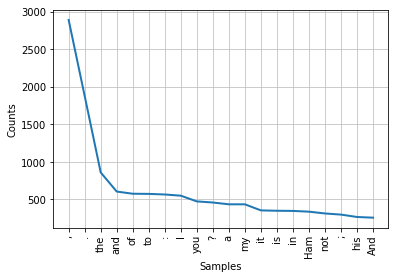

In [14]:
%matplotlib inline
hamlet.plot(20)   #hamlet 자주 나타난 상위 20단어
                  #언어의 특성상 ',' 'the'이런 단어들이 많음. 제거할 필요가 있음.

## (4) 토큰(Token) 추출, 랭크 (ex. Stopwords 제거)

In [20]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
# stop_words 출력
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [21]:
# 원하는 Stopword 추가
newStopWords = ['!','&','?',',',"'",':',' ', '.', ';']
stop_words.extend(newStopWords)

In [22]:
# stopwords 제외한 token2
token2 = [h for h in hamlet if not h in stop_words]
print(token2[:10])

['[', 'The', 'Tragedie', 'Hamlet', 'William', 'Shakespeare', '1599', ']', 'Actus', 'Primus']


In [23]:
print("Stopword 제거 전")
print("문서의 길이 : ", len(hamlet.tokens))       # 문서의 길이 반환
print("단어의 set 수 : ", len(set(hamlet.tokens)))  # 단어의 set 반환(유니크 단어 수)
 

Stopword 제거 전
문서의 길이 :  36382
단어의 set 수 :  5536


In [24]:
print("Stopword 제거 후")
hamlet2= nltk.Text(token2)
print("문서의 길이 : ", len(hamlet2.tokens))       # 문서의 길이 반환
print("단어의 set 수 : ",len(set(hamlet2.tokens)))  # 단어의 set 반환(유니크 단어 수)
print("단어의 빈도수 출력")
voca2 = hamlet2.vocab() 

Stopword 제거 후
문서의 길이 :  19118
단어의 set 수 :  5423
단어의 빈도수 출력


In [25]:
list(voca2.items())[:10]

[('[', 6),
 ('The', 133),
 ('Tragedie', 3),
 ('Hamlet', 99),
 ('William', 1),
 ('Shakespeare', 1),
 ('1599', 1),
 (']', 6),
 ('Actus', 2),
 ('Primus', 1)]

In [26]:
sorted(voca2.items(),key = lambda kv:kv[1],reverse=True)[:10]

[('I', 550),
 ('Ham', 337),
 ('And', 257),
 ('Lord', 211),
 ("'d", 200),
 ('King', 172),
 ('haue', 158),
 ('The', 133),
 ('That', 120),
 ("'s", 119)]

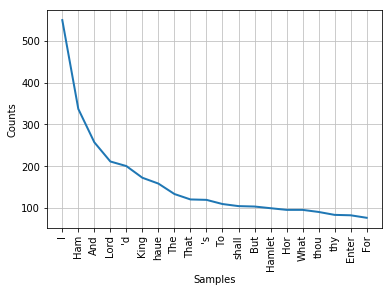

In [20]:
hamlet2.plot(20)   #hamlet2 자주 나타난 상위 20단어

In [31]:
data = hamlet2.vocab().items()
print(list(data)[:10]) #각 단어별 빈도수를 묶어서 데이터 셋으로 저장

[('[', 6), ('The', 133), ('Tragedie', 3), ('Hamlet', 99), ('William', 1), ('Shakespeare', 1), ('1599', 1), (']', 6), ('Actus', 2), ('Primus', 1)]


In [22]:
hamlet2.count('father')   #hamlet에서 father라는 단어가 나온 빈도수

4

In [23]:
hamlet2.similar('Hamlet') #Hamlet과 의미가 유사하게 사용된 단어

lord enter king i quiet horatio hast o speake made ghost comes see
tell why oh bird exeunt queene wife


## (5) 결과 시각화

In [32]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

wcloud = WordCloud(max_font_size=30).generate(doc_en)
# wcloud.words_  # 단어별 빈도수를 확률로 보여줌 

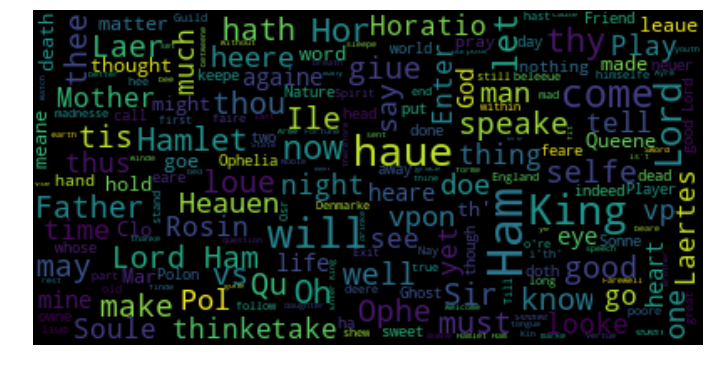

In [27]:
plt.figure(figsize=(12,12))
plt.imshow(wcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [33]:
import numpy as np
from PIL import Image
hamlet_mask=np.array(Image.open("hamlet_mask.jpg"))
# hamlet_mask

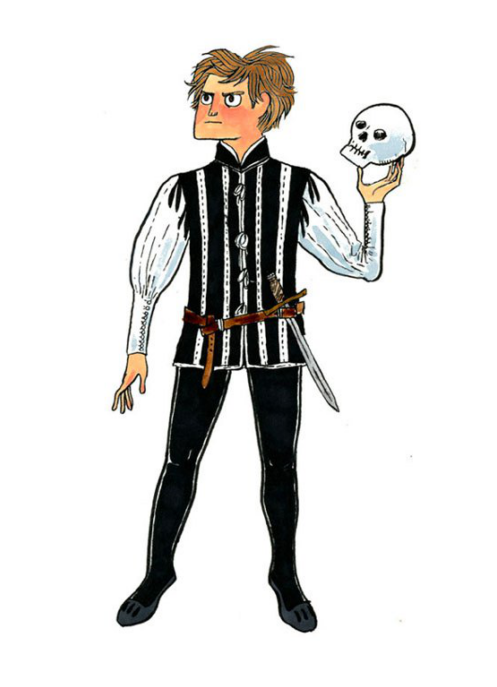

In [29]:
plt.figure(figsize=(12,12))
plt.imshow(hamlet_mask, interpolation="bilinear")
plt.axis("off")
plt.show()

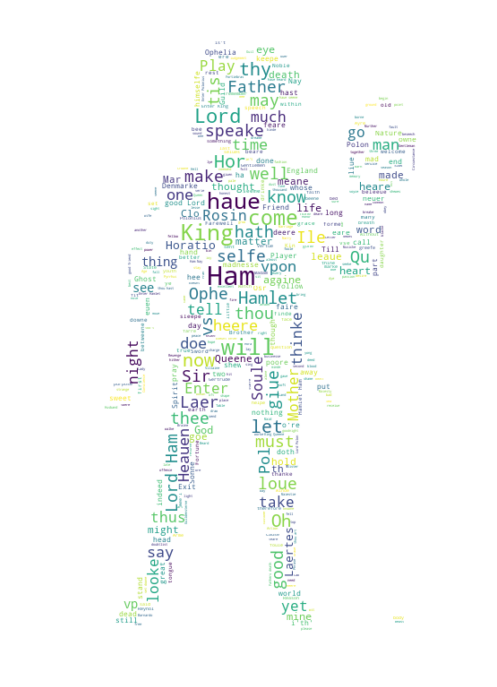

In [20]:
wcloud2 = WordCloud(background_color="white",max_words=1000, mask=hamlet_mask, max_font_size=30).generate(doc_en)
plt.figure(figsize=(12,12))
plt.imshow(wcloud2, interpolation="bilinear")
plt.axis("off")
plt.show()
